**寶可夢圖鑑網址自己去找寶可夢英文名字**

網址: [寶可夢大全](https://wiki.52poke.com/wiki/%E5%AE%9D%E5%8F%AF%E6%A2%A6%E5%88%97%E8%A1%A8%EF%BC%88%E6%8C%89%E5%85%A8%E5%9B%BD%E5%9B%BE%E9%89%B4%E7%BC%96%E5%8F%B7%EF%BC%89/%E7%AE%80%E5%8D%95%E7%89%88)
> 記得名字都要換成小寫 \
> 請先安裝套件```pip install playsound natsort```

In [1]:
import logging,os,json,subprocess
from urllib.parse import quote
from natsort import natsorted
import requests
from PIL import Image
from playsound import playsound

logging.basicConfig(level=logging.INFO)

In [2]:
class PokeMon:
    def __init__(self, name: str) -> None:
        self.name = name

    def poken_information_scraping(self):
        url = f"https://pokeapi.co/api/v2/pokemon/{self.name}"

        response = requests.get(url).json()

        pokemon_name = response['species']['name']

        save_dir = './info'

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        save_file = f"{save_dir}/{pokemon_name}.json"

        # 先將檔案匯出以方便解析
        with open(save_file, 'w', encoding='utf-8') as file:
            json.dump(response, file, ensure_ascii=False, indent=4)
            logging.info(f"Pokemon data saved to {save_file}")

        return response
    
    def parse_pokemon_info(self):
        data = self.poken_information_scraping()
        pokemon_info = {}

        pokemon_info['name'] = data["name"]
        pokemon_info['weight'] = data['weight']
        pokemon_info['height'] = data['height']
        pokemon_info['image'] = data['sprites']['other']['home']['front_default']

        moves = []
        for move in data['moves']:
            moves.append(move['move']['name'])
        
        pokemon_info['moves'] = moves

        return pokemon_info

# 將介紹錄製成聲音

```text
下載 google 小姐的聲音 (以下是轉成中文的網址，英文版請講zh-TW換成en)

Web API 網址:
https://translate.google.com/translate_tts?ie=UTF-8&client=tw-ob&tl=zh-TW&q=你的自訂文字

將文字進行 url encode 網頁:
https://www.onlinewebtoolkit.com/url-encode-decode

在 Terminal 使用 curl 指令下載 mp3:
curl -X GET "https://translate.google.com/translate_tts?ie=UTF-8&client=tw-ob&tl=zh-TW&q=%E4%BD%A0%E7%9A%84%E8%87%AA%E8%A8%82%E6%96%87%E5%AD%97" -o ./test.mp3

tl=zh-TW 的其它設定:
https://gist.github.com/JT5D/a2fdfefa80124a06f5a9
```

In [5]:
class AudioInstroduce:
    def __init__(self, pokemon_info: dict):
        self.pokemon_info = pokemon_info

    def introduce(self):
        
        # 轉換時是有字數限制的，約略200字
        moves = [x.replace('-', ' ') for x in self.pokemon_info['moves']]
        chunked_moves = [moves[i:i + 10] for i in range(0, len(moves), 10)]
        
        list_introduce = [
            f"This is {self.pokemon_info['name']}",
            f"It weights {self.pokemon_info['weight']}",
            f"It height is {self.pokemon_info['height']}",
            "It moves include"
        ]

        list_introduce.extend(chunked_moves)

        return list_introduce

    def transform_to_audio(self):

        save_file = f"./audio/{self.pokemon_info['name']}"

        if not os.path.exists(save_file):
            os.makedirs(save_file)
        
        for index, content in enumerate(self.introduce()):
            
            encode_url = quote(str(content))

            cmd = [
                'curl',
                '-X',
                'GET',
                f'https://translate.google.com/translate_tts?ie=UTF-8&client=tw-ob&tl=en&q={encode_url}',
                '-o',
                f"{save_file}/{index}.mp3"
            ]
            std_output = subprocess.run(cmd)

            if std_output.returncode == 0:
                pass
            else:
                logging.error(f"Failed to generate audio file {self.pokemon_info['name']}.")

        audio_list = []
        for each_file in os.listdir(save_file):
            if each_file.endswith('.mp3'):
                file_path = os.path.join(save_file, each_file)
                audio_list.append(file_path)
        return audio_list

INFO:root:Pokemon data saved to ./info/pikachu.json


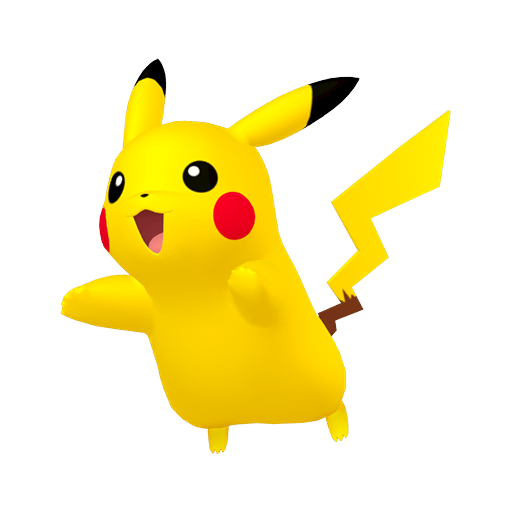

KeyboardInterrupt: 

In [6]:
if __name__ == '__main__':
    pokemon = PokeMon("pikachu")
    pokemon_info = pokemon.parse_pokemon_info()
    audio_list = AudioInstroduce(pokemon_info).transform_to_audio()
    audio_list.sort()
    display(Image.open(requests.get(pokemon_info['image'], stream=True).raw))
    for audio in natsorted(audio_list):
        playsound(audio)